In [2]:
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

## 1. Visualise generalisation over time steps

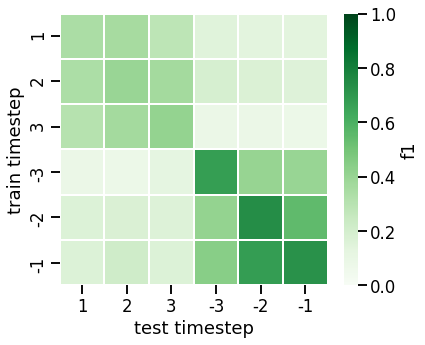

In [3]:
results = pickle.load(open("results_time.pickle", 'rb'))

fig = plt.figure(figsize=(6, 5))
sns.set_context("talk")
heatmap = np.zeros((6, 6))
for i, t1 in enumerate([0, 1, 2, -3, -2, -1]):
    for j, t2 in enumerate([0, 1, 2, -3, -2, -1]):
        heatmap[i, j] = np.mean(results[("h_c_enc", 25, t1, t2)]["means"])

ax = sns.heatmap(heatmap, cmap="Greens", linewidths=2, linecolor="white", cbar_kws={'label': 'f1'},
                 vmin=0, vmax=1)
ax.set_xticklabels([1, 2, 3, -3, -2, -1])
ax.set_yticklabels([1, 2, 3, -3, -2, -1])
ax.set_xlabel("test timestep")
ax.set_ylabel("train timestep")
plt.savefig("figures/generalisation_over_time.pdf", bbox_inches="tight")

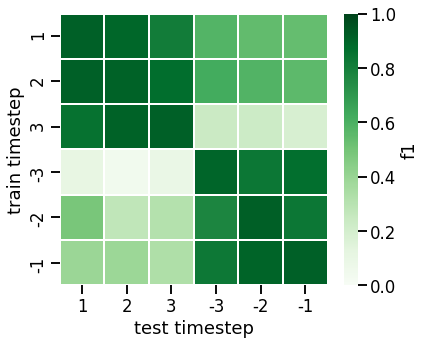

In [4]:
fig = plt.figure(figsize=(6, 5))
sns.set_context("talk")
heatmap = np.zeros((6, 6))
for i, t1 in enumerate([0, 1, 2, -3, -2, -1]):
    for j, t2 in enumerate([0, 1, 2, -3, -2, -1]):
        heatmap[i, j] = np.mean([results[("h_c_enc", 25, t1, t2)]["means"][0]])

ax = sns.heatmap(heatmap, cmap="Greens", linewidths=2, linecolor="white", cbar_kws={'label': 'f1'},
                 vmin=0, vmax=1)
ax.set_xticklabels([1, 2, 3, -3, -2, -1])
ax.set_yticklabels([1, 2, 3, -3, -2, -1])
ax.set_xlabel("test timestep")
ax.set_ylabel("train timestep")
plt.savefig("figures/generalisation_over_time_en.pdf", bbox_inches="tight")

## 2. Visualisation of the 6 different model components

dict_keys([('h_c_enc', 25, 0, 0), ('h_c_enc', 25, 1, 1), ('h_c_enc', 25, 2, 2), ('h_c_enc', 25, -3, -3), ('h_c_enc', 25, -2, -2), ('h_c_enc', 25, -1, -1), ('h_enc', 25, 0, 0), ('h_enc', 25, 1, 1), ('h_enc', 25, 2, 2), ('h_enc', 25, -3, -3), ('h_enc', 25, -2, -2), ('h_enc', 25, -1, -1), ('c_enc', 25, 0, 0), ('c_enc', 25, 1, 1), ('c_enc', 25, 2, 2), ('c_enc', 25, -3, -3), ('c_enc', 25, -2, -2), ('c_enc', 25, -1, -1), ('i_enc', 25, 0, 0), ('i_enc', 25, 1, 1), ('i_enc', 25, 2, 2), ('i_enc', 25, -3, -3), ('i_enc', 25, -2, -2), ('i_enc', 25, -1, -1), ('f_enc', 25, 0, 0), ('f_enc', 25, 1, 1), ('f_enc', 25, 2, 2), ('f_enc', 25, -3, -3), ('f_enc', 25, -2, -2), ('f_enc', 25, -1, -1), ('o_enc', 25, 0, 0), ('o_enc', 25, 1, 1), ('o_enc', 25, 2, 2), ('o_enc', 25, -3, -3), ('o_enc', 25, -2, -2), ('o_enc', 25, -1, -1)])


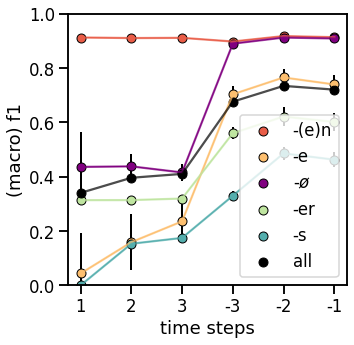

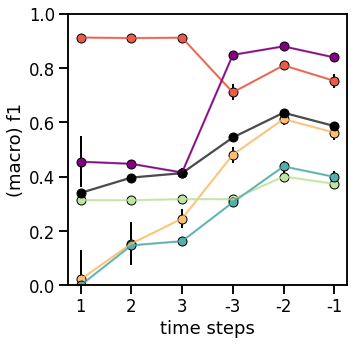

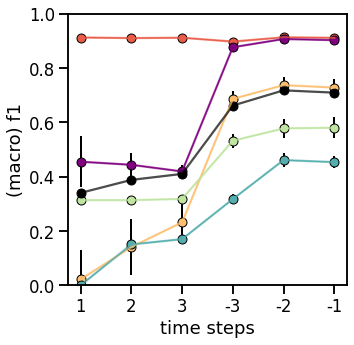

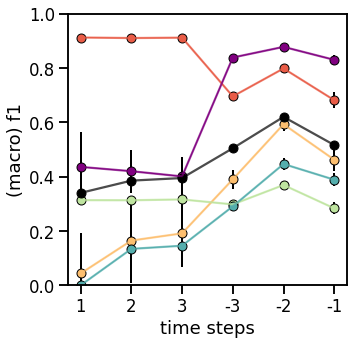

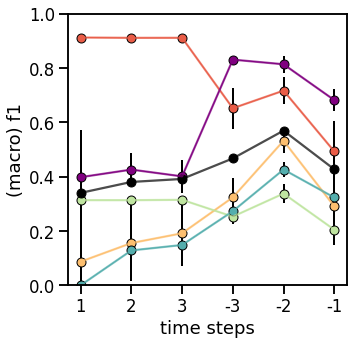

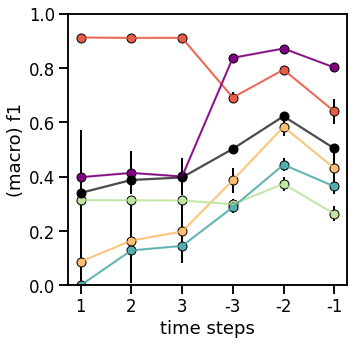

In [5]:
results = pickle.load(open("results_components.pickle", 'rb'))

for enc_type in ["h_c_enc", "h_enc", "c_enc", "i_enc", "f_enc", "o_enc"]:
    sns.set_context("talk")
    fig = plt.figure(figsize=(5, 5))
    colours = sns.color_palette("Spectral", 5)
    colours[2] = "purple"
    labels = {0: "-(e)n", 1: "-e", 2: r"-$\o$", 3: "-er", 4: "-s"}
    timesteps = [0, 1, 2, -3, -2, -1]
    for class_ in [0, 1, 2, 3, 4]:
        ax = sns.scatterplot(x=[0, 1, 2, 3, 4, 5],
                             y=[float(results[(enc_type, 25, t, t)]["means"][class_]) for t in timesteps],
                             color=colours[class_], linewidth=1, edgecolor='black', label=labels[class_])
        ax = sns.lineplot(x=[0, 1, 2, 3, 4, 5],
                          y=[float(results[(enc_type, 25, t, t)]["means"][class_]) for t in timesteps],
                          color=colours[class_], alpha=0.7)
        plt.errorbar(
            x=[0, 1, 2, 3, 4, 5],
            y=[float(results[(enc_type, 25, t, t)]["means"][class_]) for t in timesteps],
            yerr=[float(results[(enc_type, 25, t, t)]["stds"][class_]) for t in timesteps],
            color=colours[class_], linewidth=1,
            ecolor="black", elinewidth=2,  zorder=-1)

    ax = sns.scatterplot(x=[0, 1, 2, 3, 4, 5],
                         y=[float(results[(enc_type, 25, t, t)]["means"][-1]) for t in timesteps],
                         color="black", linewidth=1, edgecolor='black', label="all")
    ax = sns.lineplot(x=[0, 1, 2, 3, 4, 5],
                      y=[float(results[(enc_type, 25, t, t)]["means"][-1]) for t in timesteps],
                      color="black", alpha=0.7)

    ax.set_xticks([0, 1, 2, 3, 4, 5])
    ax.set_xticklabels([1, 2, 3, -3, -2, -1])
    plt.xlabel("time steps")
    plt.ylabel("(macro) f1")
    if enc_type != "h_c_enc":
        plt.legend([], [], frameon=False)
    plt.ylim(0, 1.0)
    plt.savefig(f"figures/dc_over_components_{enc_type}.pdf", bbox_inches="tight")
    plt.show()

## 3. Visualise F1-scores over the course of training

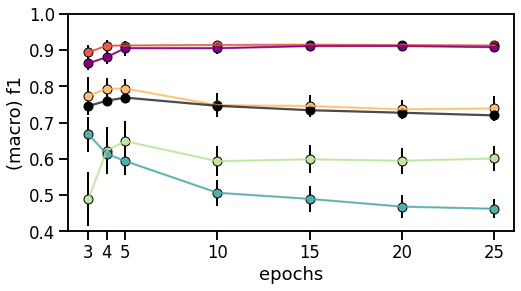

In [6]:
results = pickle.load(open("results_epochs.pickle", 'rb'))

sns.set_context("talk")
fig = plt.figure(figsize=(8, 4))
colours = sns.color_palette("Spectral", 5)
colours[2] = "purple"
labels = {0: "-(e)n", 1: "-e", 2: r"-$\o$", 3: "-er", 4: "-s"}
epochs = [3, 4, 5, 10, 15, 20, 25]
for class_ in [0, 1, 2, 3, 4]:
    ax = sns.scatterplot(x=[3, 4, 5, 10, 15, 20, 25],
                         y=[float(results[("h_c_enc", t, -1, -1)]["means"][class_]) for t in epochs],
                         color=colours[class_], linewidth=1, edgecolor='black', label=labels[class_])
    ax = sns.lineplot(x=[3, 4, 5, 10, 15, 20, 25],
                      y=[float(results[("h_c_enc", t, -1, -1)]["means"][class_]) for t in epochs],
                      color=colours[class_], alpha=0.7)
    plt.errorbar(
        x=[3, 4, 5, 10, 15, 20, 25],
        y=[float(results[("h_c_enc", t, -1, -1)]["means"][class_]) for t in epochs],
        yerr=[float(results[("h_c_enc", t, -1, -1)]["stds"][class_]) for t in epochs],
        color=colours[class_], linewidth=1,
        ecolor="black", elinewidth=2,  zorder=-1)

ax = sns.scatterplot(x=[3, 4, 5, 10, 15, 20, 25],
                     y=[float(results[("h_c_enc", t, -1, -1)]["means"][-1]) for t in epochs],
                     color="black", linewidth=1, edgecolor='black', label="all")
ax = sns.lineplot(x=[3, 4, 5, 10, 15, 20, 25],
                  y=[float(results[("h_c_enc", t, -1, -1)]["means"][-1]) for t in epochs],
                  color="black", alpha=0.7)

ax.set_xticks([3, 4, 5, 10, 15, 20, 25])
ax.set_xticklabels([3, 4, 5, 10, 15, 20, 25])
plt.xlabel("epochs")
plt.ylabel("(macro) f1")
plt.ylim(0.4, 1.0)
plt.legend([], [], frameon=False)
plt.savefig(f"figures/dc_over_epochs.pdf", bbox_inches="tight")
plt.show()

In [ ]:
results[("h_c_enc", 25, -1, -1)][baseline_max]